# This script adds the initial result of F0 to the True Valleys / Peaks results

### **Load the required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **Load the csv file using pd.read_csv**

In [2]:
data = pd.read_csv('~/Downloads/Fluorometer/Basil_Trial/03-07-22/03-07-2022_05_00_peaks_valleys_2.csv')

### **Inspect the Dataset**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   True Valleys  29 non-null     float64
 1   Peaks         29 non-null     float64
dtypes: float64(2)
memory usage: 592.0 bytes


In [6]:
data.head(30)

,True Valleys,Peaks
0,0.000000,162.321784
1,0.000000,153.436683
2,59.232819,154.267103
3,58.175713,154.330111
4,58.065664,155.416533
5,58.076995,156.040029
6,58.222344,156.648258
7,58.420521,157.219873
8,58.334482,156.727419
9,58.388018,156.612536


### **Eliminate the first two rows of the dataset**

In [5]:
data2 = data.iloc[2:]
data2.head(28)

,True Valleys,Peaks
2,59.232819,154.267103
3,58.175713,154.330111
4,58.065664,155.416533
5,58.076995,156.040029
6,58.222344,156.648258
7,58.420521,157.219873
8,58.334482,156.727419
9,58.388018,156.612536
10,58.352337,156.466523
11,58.700397,156.927546


### **Add the F0 value to the dataset columns**

In [8]:
new_value = data2 + 5.5
new_value.head(28)

,True Valleys,Peaks
2,64.732819,159.767103
3,63.675713,159.830111
4,63.565664,160.916533
5,63.576995,161.540029
6,63.722344,162.148258
7,63.920521,162.719873
8,63.834482,162.227419
9,63.888018,162.112536
10,63.852337,161.966523
11,64.200397,162.427546


### **Create a new column called PSII and add the values of the formula Fq'/Fm' or PSII = (last_peak - last_valley) / last_peak**

In [108]:
new_value['PSII'] = (new_value['Peaks']-new_value['True Valleys'])/new_value['Peaks'] 
new_value.head()

,True Valleys,Peaks,PSII
2,64.732819,159.767103,0.594830
3,63.675713,159.830111,0.601604
4,63.565664,160.916533,0.604977
5,63.576995,161.540029,0.606432
6,63.722344,162.148258,0.607012


### **We need to find the value of the first peak which we deleted in step 4 so, we revert back to the original 'data' dataframe, add F0, then delete all the rows except the first one.**

In [127]:
fixed_value = data['Peaks']
fixed_value = fixed_value + 5.5
fixed_value = fixed_value.iloc[:-19]
fixed_value.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1 entries, 0 to 0
Series name: Peaks
Non-Null Count  Dtype  
--------------  -----  
1 non-null      float64
dtypes: float64(1)
memory usage: 136.0 bytes


### **Let's calculate NPQ based on the formula NPQ = (first_peak - last_peak) / last_peak**

In [134]:
new_value['NPQ'] = (fixed_value[0] - new_value['Peaks'])/new_value['Peaks']
new_value.head()

,True Valleys,Peaks,PSII,NPQ
2,64.732819,159.767103,0.594830,0.050415
3,63.675713,159.830111,0.601604,0.050001
4,63.565664,160.916533,0.604977,0.042912
5,63.576995,161.540029,0.606432,0.038887
6,63.722344,162.148258,0.607012,0.034990


### **Let's calculate now the relative Electron Transport Rate (rETR) using PSII x 284 x 0.5 x 0.84**

In [135]:
new_value['rETR'] = new_value['PSII'] * 284 * 0.5 * 0.84
new_value.head()

,True Valleys,Peaks,PSII,NPQ,rETR
2,64.732819,159.767103,0.594830,0.050415,70.951336
3,63.675713,159.830111,0.601604,0.050001,71.759298
4,63.565664,160.916533,0.604977,0.042912,72.161707
5,63.576995,161.540029,0.606432,0.038887,72.335202
6,63.722344,162.148258,0.607012,0.034990,72.404374


### **Plot NPQ against rETR**

<AxesSubplot:xlabel='rETR'>

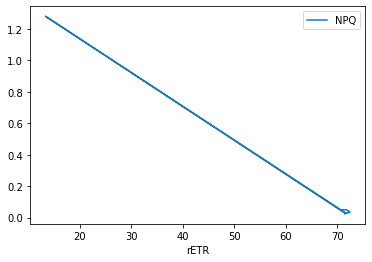

In [137]:
new_value.plot(x = 'NPQ', y = 'rETR', kind = 'line')